In [58]:
# %config InlineBackend.figure_formats = ['svg']

In [59]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split


In [60]:
import seaborn_figure_settings

In [61]:
save_dpath = os.path.join('../notebooks/figures/', 'reruns')
os.makedirs(save_dpath,exist_ok=True)

In [62]:
from matplotlib.colors import  ListedColormap
import matplotlib.ticker as mtick

In [63]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [64]:
morder = ['MIXOTROPH', 'OVERFLOW', 'EXOENZYME',  'ROS',]
media_order = ['lowN', 'pro99']
mpalette = [ '#84dcc6', '#426b69', '#9b7874', '#b191ff', ]
#mpalette = sns.color_palette(mpalette)
#morder = [morder[1]] + morder[3:]
#mpalette = [mpalette[1]] + mpalette[3:]
sns.color_palette(mpalette)

[(0.5176470588235295, 0.8627450980392157, 0.7764705882352941),
 (0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0)]

In [65]:
vorder1 = ['Versatile VPRO', 'Positive VPRO', 'Negative VPRO',  ]
vorder1 = ['Versatile VPRO','Non-Versatile VPRO',  ]
vorder1_labels = ['Versatile vPro','Non-Versatile vPro',  ]

vpalette1 = [gpalette[1], gpalette[0], gpalette[3], gpalette[4], ]
vpalette1 = ['#5e392f', gpalette[1], gpalette[3],  ]
vpalette1 = [
    '#5E392F', 
    #'#DC267F',
    #'#FE6100',
    '#648FFF',
    #'#785EF0',
]
print (vorder1)
sns.color_palette(vpalette1)

['Versatile VPRO', 'Non-Versatile VPRO']


[(0.3686274509803922, 0.2235294117647059, 0.1843137254901961),
 (0.39215686274509803, 0.5607843137254902, 1.0)]

In [66]:
cmap = {
    'Original' : 'Original\nvPro: 12.5 fg N/cell', 
    'rerun_het_BP05' : 'vPro: 7 fg N/cell', 
    'rerun_het_BP14' : 'vPro: 20 fg N/cell', 
    'rerun_het_CP13' : 'vPro init C:N: 8',
    'rerun_het_DIN800' : 'DIN=800 µM N', 
    'rerun_het_DOC160' : 'DOC=160 µM C',
}
corder = ['Original\nvPro: 12.5 fg N/cell', 'vPro: 7 fg N/cell',
       'vPro: 20 fg N/cell', 'vPro init C:N: 8', 'DIN=800 µM N',
       'DOC=160 µM C']
nofilterorder = ['Original\nFilter infeasible vHet', 'No C:N Filter']
#count_init_df.Category.unique()


In [67]:
morder

['MIXOTROPH', 'OVERFLOW', 'EXOENZYME', 'ROS']

In [68]:
import os
import glob
dpath = '../results/rerun_sensitivity_init/clean'
dpath2 = '../results/final/het/'

#glob.glob(os.path.join(dpath, 'versatile_vpros_*'))

In [69]:
orig_vpro_df = pd.read_csv('../results/final/het/versatile_vpros_monte_het_clean.csv')
orig_vpro_df['Category'] = 'Original'

In [70]:
shading_vpro_df = pd.read_csv('../results/rerun_sensitivity/clean_shading/clean_shading/versatile_vpros_monte_het_clean_clean.csv')
shading_vpro_df['Category'] = 'Shading'

In [71]:
nofilter_vpro_df = pd.read_csv('../results/c2n_filtering/versatile_vpros_monte_het_clean.csv')
nofilter_vpro_df['Category'] = 'No C:N Filter'

In [72]:
def _readvfile(fname):
    category = fname.replace('../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_','').replace('_init.csv','')
    print (fname, category)
    df = pd.read_csv(fname)
    df['Category'] = category
    return df
vpro_df = pd.concat([_readvfile(f) for f in glob.glob(os.path.join(dpath, 'versatile_vpros_*'))], ignore_index=True)


../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_DOC160_init.csv DOC160
../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_BP05_init.csv BP05
../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_DOC2500_init.csv DOC2500
../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_DIN800DOC160_init.csv DIN800DOC160
../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_BP14_init.csv BP14
../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_DIN800_init.csv DIN800
../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_DIN800DOC2500_init.csv DIN800DOC2500
../results/rerun_sensitivity_init/clean/versatile_vpros_rerun_het_CP13_init.csv CP13


In [73]:
vpro_df = pd.concat([vpro_df, orig_vpro_df, shading_vpro_df, nofilter_vpro_df], ignore_index=True).copy()

In [74]:
vpro_df.VPRO.value_counts()

VPRO
vpro_11_62_EXOENZYME_C1    11
vpro_12_88_EXOENZYME_C2    11
vpro_2_22_51_OVERFLOW      11
vpro_2_23_61_OVERFLOW      11
vpro_2_23_78_OVERFLOW      11
                           ..
vpro_64_97_MIN_C1          11
vpro_71_74_MIN_C2          11
vpro_75_4_MIN_C1           11
vpro_76_72_MIN_C1          11
vpro_97_23_ROS_C1          11
Name: count, Length: 208, dtype: int64

In [75]:
vpro_df

,model,VPRO,Inhibited,Neutral,Other,Strong,Sustained,Weak,pos_interaction,neg_interaction,Versatile,Category
0,EXOENZYME,vpro_11_62_EXOENZYME_C1,0.0,19,6,0,62,79,62,79,True,DOC160
1,EXOENZYME,vpro_12_88_EXOENZYME_C2,0.0,12,0,0,0,38,0,38,False,DOC160
2,EXOENZYME,vpro_13_4_EXOENZYME_C3,0.0,100,2,0,0,0,0,0,False,DOC160
3,EXOENZYME,vpro_13_69_EXOENZYME_C1,3.0,91,0,0,77,14,77,17,True,DOC160
4,EXOENZYME,vpro_17_89_EXOENZYME_C2,0.0,0,0,0,0,46,0,46,False,DOC160
...,...,...,...,...,...,...,...,...,...,...,...,...
2283,ROS,vpro_89_60_ROS_C2,0.0,0,0,0,0,333,0,333,False,No C:N Filter
2284,ROS,vpro_90_89_ROS_C0,0.0,17,188,0,0,142,0,142,False,No C:N Filter
2285,ROS,vpro_93_82_ROS_C1,5.0,0,0,0,0,316,0,321,False,No C:N Filter
2286,ROS,vpro_96_60_ROS_C1,0.0,0,0,0,0,319,0,319,False,No C:N Filter


In [76]:
vpro_df['Versatile_STR'] = vpro_df.Versatile.map({True: 'Versatile VPRO',False: 'Non-Versatile VPRO',  })
#vpro_df.loc[vpro_df.pos_interaction.ge(1) & ~vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Positive VPRO'
#vpro_df.loc[~vpro_df.pos_interaction.ge(1) & vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Negative VPRO'
#vpro_df.loc[~vpro_df.pos_interaction.ge(1) & ~vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Negative VPRO'



In [77]:
vpro_df['Category'].unique()

array(['DOC160', 'BP05', 'DOC2500', 'DIN800DOC160', 'BP14', 'DIN800',
       'DIN800DOC2500', 'CP13', 'Original', 'Shading', 'No C:N Filter'],
      dtype=object)

In [78]:
sensitivity_map = {
    'Original' : 'Original\nvPro biomass:\n12.5 fg N/cell', 
    'BP05' : 'vPro biomass:\n7 fg N/cell', 
    'BP14' : 'vPro biomass:\n20 fg N/cell', 
    'CP13' : 'vPro Initial C:N: 8',
    'Shading' : 'Shading Correction',
}
vpro_df['Sensitivity'] = vpro_df['Category'].map(sensitivity_map)

sensitivity_order = [
    'Original\nvPro biomass:\n12.5 fg N/cell', 
    'vPro biomass:\n7 fg N/cell', 
    'vPro biomass:\n20 fg N/cell', 
    'vPro Initial C:N: 8',
    #'Shading Correction',
]


In [125]:
nofilter_map = {
    'Original' : 'Original\nFilter infeasible vHet', 
    'No C:N Filter' : 'All simulations\nNo C:N Filter', 
}
vpro_df['Filter Status'] = vpro_df['Category'].map(nofilter_map)
nofilter_order = ['Original\nFilter infeasible vHet', 'All simulations\nNo C:N Filter']

In [111]:
#sensitivity_order = ['Original', 'BP05', 'BP14', 'CP13', 'Shading']
media_order = ['Original', 'DOC160', 'DOC2500', 'DIN800DOC160',  'DIN800', 'DIN800DOC2500',  ]

In [112]:
DEFAULT_DOC = 20
DEFAULT_DIN = 100
docmap ={
    'Original' : DEFAULT_DOC,
    'DOC160' : 160,
    'DOC2500' : 2500, 
    'DIN800DOC160' : 160,  
    'DIN800' : DEFAULT_DOC, 
    'DIN800DOC2500' : 2500,
}
dinmap ={
    'Original' : DEFAULT_DIN,    
    'DOC160' : DEFAULT_DIN,
    'DOC2500' : DEFAULT_DIN, 
    'DIN800DOC160' : 800,  
    'DIN800' : 800, 
    'DIN800DOC2500' :800,
}


In [113]:
#vpro_df['Category'] = vpro_df.category.map(cmap)
vpro_df['DOC'] = vpro_df['Category'].map(docmap)
vpro_df['DIN'] = vpro_df['Category'].map(dinmap)

In [114]:
id_vars= ['Category', 'model', 'DIN', 'DOC', 'Sensitivity', 'Filter Status']

In [115]:
vorder = ['Versatile VPRO','Non-Versatile VPRO',  ]
vpalette = [ '#FF8E8F', '#9c110b']
vpalette = [ 'black', '#9c110b']

sns.color_palette(vpalette)

[(0.0, 0.0, 0.0),
 (0.611764705882353, 0.06666666666666667, 0.043137254901960784)]

In [116]:
vpro_df = vpro_df.loc[vpro_df.model.isin(morder)].copy()

In [117]:
count_df = vpro_df.groupby(id_vars, dropna=False)[gorder].sum().reset_index()

count_df

,Category,model,DIN,DOC,Sensitivity,Filter Status,Strong,Sustained,Inhibited,Weak,Neutral,Other
0,BP05,EXOENZYME,NaN,NaN,vPro biomass:\n7 fg N/cell,NaN,34,1827,46.0,658,3108,560
1,BP05,MIXOTROPH,NaN,NaN,vPro biomass:\n7 fg N/cell,NaN,0,0,164.0,978,1234,0
2,BP05,OVERFLOW,NaN,NaN,vPro biomass:\n7 fg N/cell,NaN,3,212,315.0,1010,3251,102
3,BP05,ROS,NaN,NaN,vPro biomass:\n7 fg N/cell,NaN,196,28,19.0,1252,569,141
4,BP14,EXOENZYME,NaN,NaN,vPro biomass:\n20 fg N/cell,NaN,113,1552,0.0,1284,2113,1246
5,BP14,MIXOTROPH,NaN,NaN,vPro biomass:\n20 fg N/cell,NaN,0,0,0.0,1520,854,0
6,BP14,OVERFLOW,NaN,NaN,vPro biomass:\n20 fg N/cell,NaN,7,152,0.0,2502,1973,251
7,BP14,ROS,NaN,NaN,vPro biomass:\n20 fg N/cell,NaN,181,0,0.0,1673,157,192
8,CP13,EXOENZYME,NaN,NaN,vPro Initial C:N: 8,NaN,59,1691,0.0,1027,2587,942
9,CP13,MIXOTROPH,NaN,NaN,vPro Initial C:N: 8,NaN,0,0,0.0,1348,1036,0


In [118]:
count_ver_df = vpro_df.loc[vpro_df.Versatile].groupby(id_vars, dropna=False)[gorder].sum().reset_index()
count_ver_df



,Category,model,DIN,DOC,Sensitivity,Filter Status,Strong,Sustained,Inhibited,Weak,Neutral,Other
0,BP05,EXOENZYME,NaN,NaN,vPro biomass:\n7 fg N/cell,NaN,0,1072,46.0,353,1160,282
1,BP05,OVERFLOW,NaN,NaN,vPro biomass:\n7 fg N/cell,NaN,2,185,149.0,518,1520,57
2,BP14,EXOENZYME,NaN,NaN,vPro biomass:\n20 fg N/cell,NaN,76,1304,0.0,795,908,917
3,BP14,OVERFLOW,NaN,NaN,vPro biomass:\n20 fg N/cell,NaN,7,152,0.0,1217,912,194
4,BP14,ROS,NaN,NaN,vPro biomass:\n20 fg N/cell,NaN,181,0,0.0,3,2,78
5,CP13,EXOENZYME,NaN,NaN,vPro Initial C:N: 8,NaN,7,1164,0.0,615,975,629
6,CP13,OVERFLOW,NaN,NaN,vPro Initial C:N: 8,NaN,5,174,0.0,962,1287,158
7,CP13,ROS,NaN,NaN,vPro Initial C:N: 8,NaN,189,8,0.0,1,2,65
8,DIN800,OVERFLOW,800.0,20.0,NaN,NaN,11,5,0.0,53,121,98
9,DIN800,ROS,800.0,20.0,NaN,NaN,115,12,0.0,42,6,56


In [119]:
vcount_df = vpro_df.groupby(id_vars, dropna=False)['Versatile'].mean().reset_index()
vcount_df


,Category,model,DIN,DOC,Sensitivity,Filter Status,Versatile
0,BP05,EXOENZYME,NaN,NaN,vPro biomass:\n7 fg N/cell,NaN,0.395349
1,BP05,MIXOTROPH,NaN,NaN,vPro biomass:\n7 fg N/cell,NaN,0.000000
2,BP05,OVERFLOW,NaN,NaN,vPro biomass:\n7 fg N/cell,NaN,0.436364
3,BP05,ROS,NaN,NaN,vPro biomass:\n7 fg N/cell,NaN,0.000000
4,BP14,EXOENZYME,NaN,NaN,vPro biomass:\n20 fg N/cell,NaN,0.511628
5,BP14,MIXOTROPH,NaN,NaN,vPro biomass:\n20 fg N/cell,NaN,0.000000
6,BP14,OVERFLOW,NaN,NaN,vPro biomass:\n20 fg N/cell,NaN,0.436364
7,BP14,ROS,NaN,NaN,vPro biomass:\n20 fg N/cell,NaN,0.033333
8,CP13,EXOENZYME,NaN,NaN,vPro Initial C:N: 8,NaN,0.441860
9,CP13,MIXOTROPH,NaN,NaN,vPro Initial C:N: 8,NaN,0.000000


In [120]:
vpro_df.columns

Index(['model', 'VPRO', 'Inhibited', 'Neutral', 'Other', 'Strong', 'Sustained',
       'Weak', 'pos_interaction', 'neg_interaction', 'Versatile', 'Category',
       'Versatile_STR', 'Sensitivity', 'Filter Status', 'DOC', 'DIN'],
      dtype='object')

In [121]:
vcount_df

,Category,model,DIN,DOC,Sensitivity,Filter Status,Versatile
0,BP05,EXOENZYME,NaN,NaN,vPro biomass:\n7 fg N/cell,NaN,0.395349
1,BP05,MIXOTROPH,NaN,NaN,vPro biomass:\n7 fg N/cell,NaN,0.000000
2,BP05,OVERFLOW,NaN,NaN,vPro biomass:\n7 fg N/cell,NaN,0.436364
3,BP05,ROS,NaN,NaN,vPro biomass:\n7 fg N/cell,NaN,0.000000
4,BP14,EXOENZYME,NaN,NaN,vPro biomass:\n20 fg N/cell,NaN,0.511628
5,BP14,MIXOTROPH,NaN,NaN,vPro biomass:\n20 fg N/cell,NaN,0.000000
6,BP14,OVERFLOW,NaN,NaN,vPro biomass:\n20 fg N/cell,NaN,0.436364
7,BP14,ROS,NaN,NaN,vPro biomass:\n20 fg N/cell,NaN,0.033333
8,CP13,EXOENZYME,NaN,NaN,vPro Initial C:N: 8,NaN,0.441860
9,CP13,MIXOTROPH,NaN,NaN,vPro Initial C:N: 8,NaN,0.000000


In [122]:
sensitivity_order

['Original\nvPro biomass:\n12.5 fg N/cell',
 'vPro biomass:\n7 fg N/cell',
 'vPro biomass:\n20 fg N/cell',
 'vPro Initial C:N: 8']

(array([0, 1, 2, 3]),
 [Text(0, 0, 'MIXOTROPH'),
  Text(1, 0, 'OVERFLOW'),
  Text(2, 0, 'EXOENZYME'),
  Text(3, 0, 'ROS')])

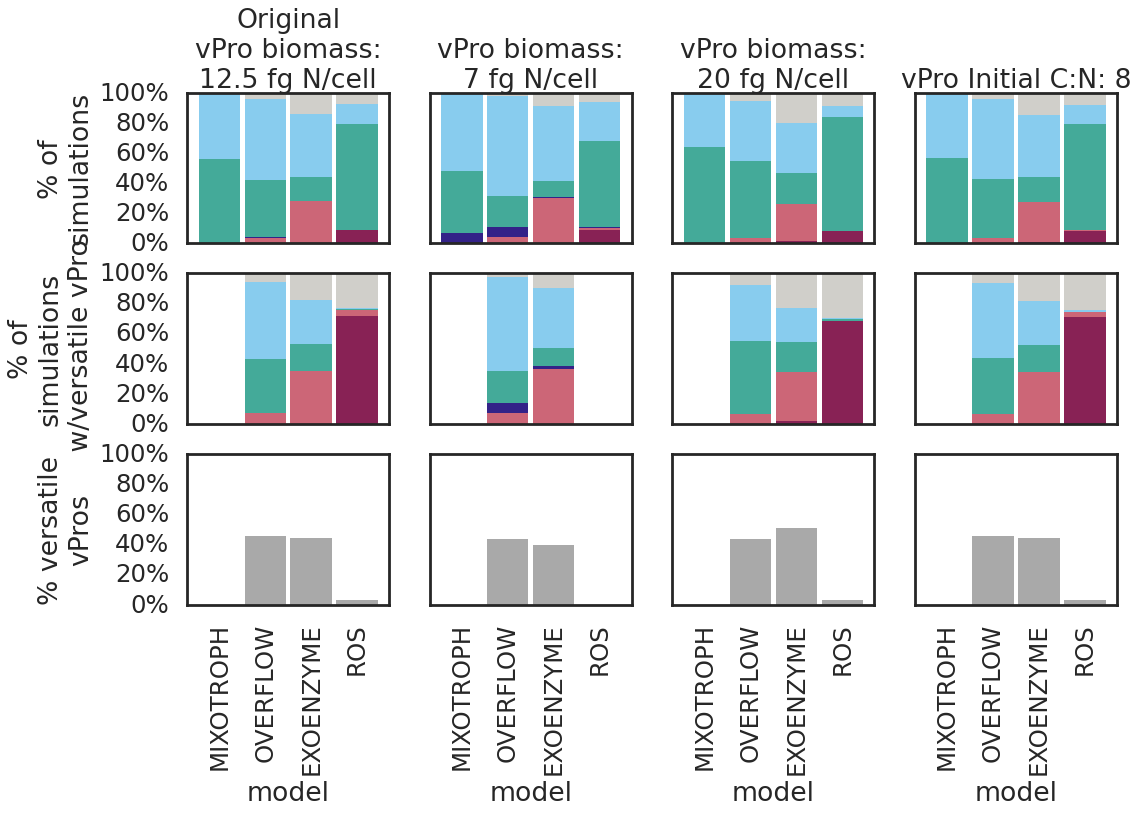

In [123]:

fig, axes = plt.subplots(3,len(sensitivity_order), figsize=(15,8), sharex=True , sharey=True)

# all simulations row
for cat, ax in zip(sensitivity_order, axes[0]):

    #cdf = count_df.copy()
    tdf = count_df.loc[count_df['Sensitivity'].isin([cat])]
    cdf = tdf[gorder].div(tdf[gorder].sum(axis=1), axis=0) * 100
    
    cdf.index=tdf.model 
    cdf = cdf.reindex(index=morder)
    cdf[gorder].plot(
        kind='bar', stacked=True, color=gpalette, width=0.9, #figsize=(3,3),
        rot=90, lw=0.01, 
        ylabel='% of\nsimulations', title=cat, legend=False,
        #title='Breakdown of Simulations per Phenotype',
        ax=ax
    )

# simulations of versatiles
for cat, ax in zip(sensitivity_order, axes[1]):

    #cdf = count_df.copy()
    tdf = count_ver_df.loc[count_ver_df['Sensitivity'].isin([cat])]
    cdf = tdf[gorder].div(tdf[gorder].sum(axis=1), axis=0) * 100
    
    cdf.index=tdf.model 
    cdf = cdf.reindex(index=morder)
    cdf[gorder].plot(
        kind='bar', stacked=True, color=gpalette, width=0.9, #figsize=(3,3),
        rot=90, lw=0.01, 
        ylabel='% of\nsimulations\n w/versatile vPro',  legend=False,
        #title='Breakdown of Simulations per Phenotype',
        ax=ax
    )

# % versatiles
for cat, ax in zip(sensitivity_order, axes[2]):

    #cdf = count_df.copy()
    cdf = vcount_df.loc[vcount_df['Sensitivity'].isin([cat])].copy()
    cdf['Versatile'] = cdf['Versatile']*100
    cdf.index=cdf.model 
    cdf = cdf.reindex(index=morder)
    cdf['Versatile'].plot(
        kind='bar', stacked=True, color='#A9A9A9', width=0.9, #figsize=(3,3),
        rot=90, lw=0.01, 
        ylabel='% versatile\nvPros',  legend=False,
        ax=ax
    )

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'MIXOTROPH'),
  Text(1, 0, 'OVERFLOW'),
  Text(2, 0, 'EXOENZYME'),
  Text(3, 0, 'ROS')])

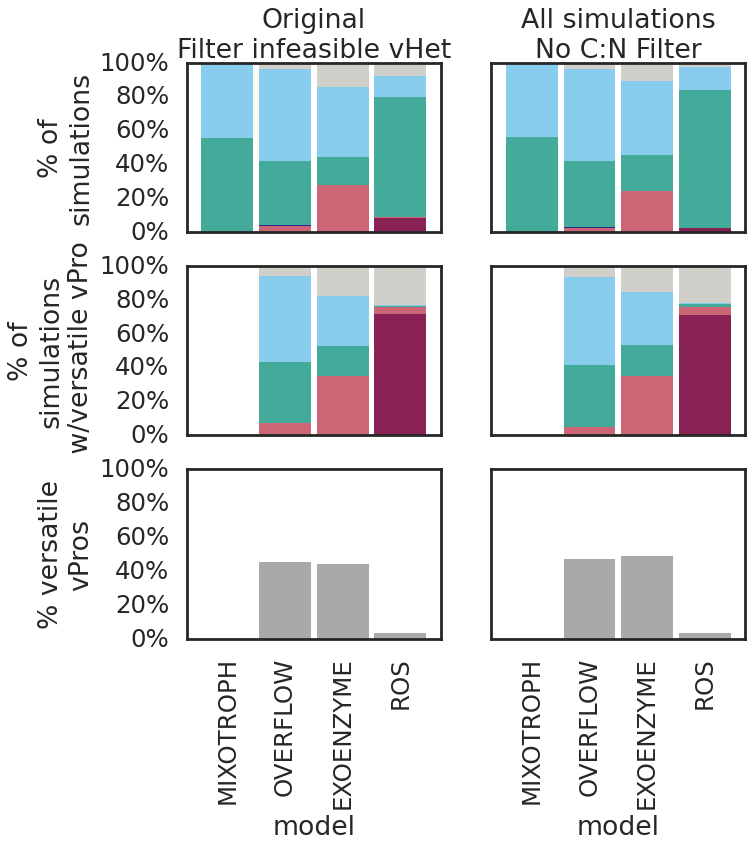

In [126]:

fig, axes = plt.subplots(3,len(nofilter_order), figsize=(9,9), sharex=True , sharey=True)

# all simulations row
for cat, ax in zip(nofilter_order, axes[0]):

    #cdf = count_df.copy()
    tdf = count_df.loc[count_df['Filter Status'].isin([cat])]
    cdf = tdf[gorder].div(tdf[gorder].sum(axis=1), axis=0) * 100
    
    cdf.index=tdf.model 
    cdf = cdf.reindex(index=morder)
    cdf[gorder].plot(
        kind='bar', stacked=True, color=gpalette, width=0.9, #figsize=(3,3),
        rot=90, lw=0.01, 
        ylabel='% of\nsimulations', title=cat, legend=False,
        #title='Breakdown of Simulations per Phenotype',
        ax=ax
    )

# simulations of versatiles
for cat, ax in zip(nofilter_order, axes[1]):

    #cdf = count_df.copy()
    tdf = count_ver_df.loc[count_ver_df['Filter Status'].isin([cat])]
    cdf = tdf[gorder].div(tdf[gorder].sum(axis=1), axis=0) * 100
    
    cdf.index=tdf.model 
    cdf = cdf.reindex(index=morder)
    cdf[gorder].plot(
        kind='bar', stacked=True, color=gpalette, width=0.9, #figsize=(3,3),
        rot=90, lw=0.01, 
        ylabel='% of\nsimulations\n w/versatile vPro',  legend=False,
        #title='Breakdown of Simulations per Phenotype',
        ax=ax
    )

# % versatiles
for cat, ax in zip(nofilter_order, axes[2]):

    #cdf = count_df.copy()
    cdf = vcount_df.loc[vcount_df['Filter Status'].isin([cat])].copy()
    cdf['Versatile'] = cdf['Versatile']*100
    cdf.index=cdf.model 
    cdf = cdf.reindex(index=morder)
    cdf['Versatile'].plot(
        kind='bar', stacked=True, color='#A9A9A9', width=0.9, #figsize=(3,3),
        rot=90, lw=0.01, 
        ylabel='% versatile\nvPros',  legend=False,
        ax=ax
    )

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)

In [33]:
count_df.groupby('Sensitivity')[gorder].sum().sum(axis=1).reindex(index=sensitivity_order)

Sensitivity
Original\nvPro biomass:\n12.5 fg N/cell    15823.0
vPro biomass:\n7 fg N/cell                 15707.0
vPro biomass:\n20 fg N/cell                15770.0
vPro Initial C:N: 8                        15796.0
dtype: float64

In [34]:
count_ver_df.groupby('Sensitivity')[gorder].sum().sum(axis=1).reindex(index=sensitivity_order)

Sensitivity
Original\nvPro biomass:\n12.5 fg N/cell    6250.0
vPro biomass:\n7 fg N/cell                 5344.0
vPro biomass:\n20 fg N/cell                6746.0
vPro Initial C:N: 8                        6241.0
dtype: float64

In [108]:
count_df.groupby('Filter Status')[gorder].sum().sum(axis=1).reindex(index=nofilter_order)

Filter Status
Original\nFilter infeasible vHet    15823.0
No C:N Filter                       39434.0
dtype: float64

In [35]:
vpro_df

,model,VPRO,Inhibited,Neutral,Other,Strong,Sustained,Weak,pos_interaction,neg_interaction,Versatile,Category,Versatile_STR,Sensitivity,DOC,DIN
0,EXOENZYME,vpro_11_62_EXOENZYME_C1,0.0,19,6,0,62,79,62,79,True,DOC160,Versatile VPRO,NaN,160.0,100.0
1,EXOENZYME,vpro_12_88_EXOENZYME_C2,0.0,12,0,0,0,38,0,38,False,DOC160,Non-Versatile VPRO,NaN,160.0,100.0
2,EXOENZYME,vpro_13_4_EXOENZYME_C3,0.0,100,2,0,0,0,0,0,False,DOC160,Non-Versatile VPRO,NaN,160.0,100.0
3,EXOENZYME,vpro_13_69_EXOENZYME_C1,3.0,91,0,0,77,14,77,17,True,DOC160,Versatile VPRO,NaN,160.0,100.0
4,EXOENZYME,vpro_17_89_EXOENZYME_C2,0.0,0,0,0,0,46,0,46,False,DOC160,Non-Versatile VPRO,NaN,160.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,ROS,vpro_89_60_ROS_C2,0.0,2,0,0,51,2,51,2,True,Shading,Versatile VPRO,Shading Correction,NaN,NaN
2076,ROS,vpro_90_89_ROS_C0,0.0,0,11,0,119,47,119,47,True,Shading,Versatile VPRO,Shading Correction,NaN,NaN
2077,ROS,vpro_93_82_ROS_C1,0.0,47,0,0,8,0,8,0,False,Shading,Non-Versatile VPRO,Shading Correction,NaN,NaN
2078,ROS,vpro_96_60_ROS_C1,0.0,0,0,0,58,8,58,8,True,Shading,Versatile VPRO,Shading Correction,NaN,NaN


In [36]:
vpro_df['Sensitivity'].value_counts()

Sensitivity
vPro biomass:\n7 fg N/cell                 163
vPro biomass:\n20 fg N/cell                163
vPro Initial C:N: 8                        163
Original\nvPro biomass:\n12.5 fg N/cell    163
Shading Correction                         163
Name: count, dtype: int64

In [37]:
media_order


['Original', 'DOC160', 'DOC2500', 'DIN800DOC160', 'DIN800', 'DIN800DOC2500']

(array([0, 1, 2, 3]),
 [Text(0, 0, 'MIXOTROPH'),
  Text(1, 0, 'OVERFLOW'),
  Text(2, 0, 'EXOENZYME'),
  Text(3, 0, 'ROS')])

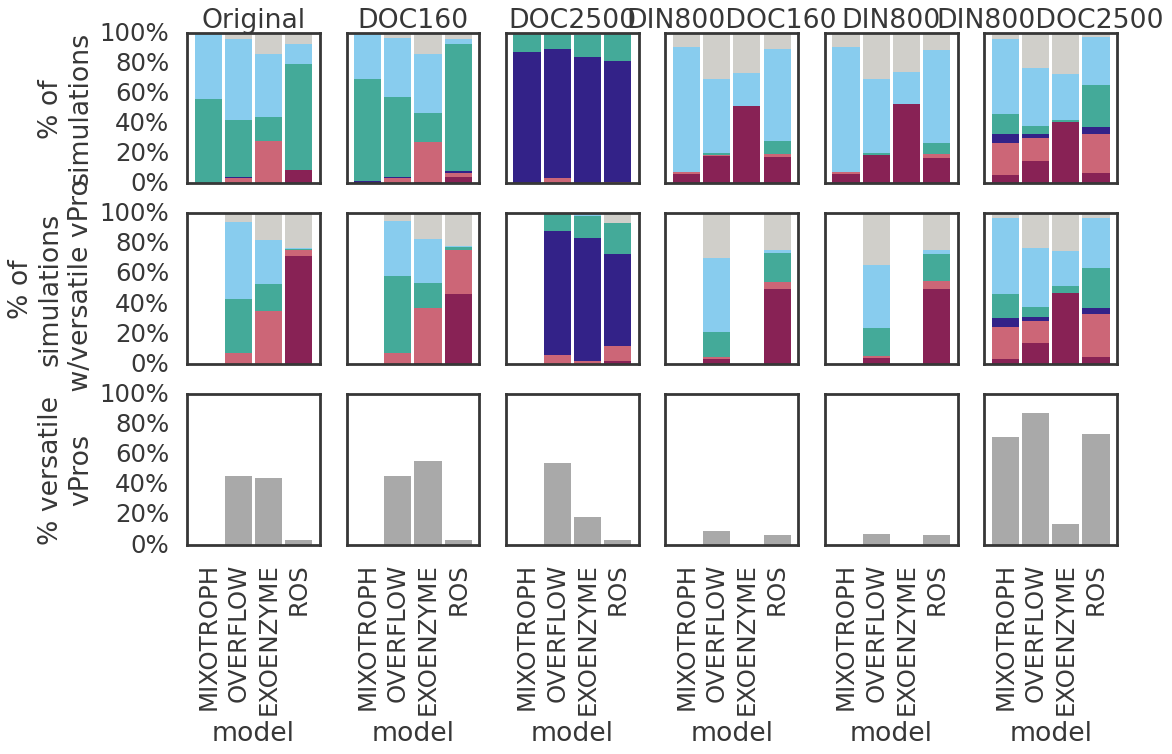

In [38]:

fig, axes = plt.subplots(3,len(media_order), figsize=(15,8), sharex=True , sharey=True)

# all simulations row
for cat, ax in zip(media_order, axes[0]):

    #cdf = count_df.copy()
    tdf = count_df.loc[count_df['Category'].isin([cat])]
    cdf = tdf[gorder].div(tdf[gorder].sum(axis=1), axis=0) * 100
    
    cdf.index=tdf.model 
    cdf = cdf.reindex(index=morder)
    cdf[gorder].plot(
        kind='bar', stacked=True, color=gpalette, width=0.9, #figsize=(3,3),
        rot=90, lw=0.01, 
        ylabel='% of\nsimulations', title=cat, legend=False,
        #title='Breakdown of Simulations per Phenotype',
        ax=ax
    )

# simulations of versatiles
for cat, ax in zip(media_order, axes[1]):

    #cdf = count_df.copy()
    tdf = count_ver_df.loc[count_ver_df['Category'].isin([cat])]
    cdf = tdf[gorder].div(tdf[gorder].sum(axis=1), axis=0) * 100
    
    cdf.index=tdf.model 
    cdf = cdf.reindex(index=morder)
    cdf[gorder].plot(
        kind='bar', stacked=True, color=gpalette, width=0.9, #figsize=(3,3),
        rot=90, lw=0.01, 
        ylabel='% of\nsimulations\n w/versatile vPro',  legend=False,
        #title='Breakdown of Simulations per Phenotype',
        ax=ax
    )

# % versatiles
for cat, ax in zip(media_order, axes[2]):

    #cdf = count_df.copy()
    cdf = vcount_df.loc[vcount_df['Category'].isin([cat])].copy()
    cdf['Versatile'] = cdf['Versatile']*100
    cdf.index=cdf.model 
    cdf = cdf.reindex(index=morder)
    cdf['Versatile'].plot(
        kind='bar', stacked=True, color='#A9A9A9', width=0.9, #figsize=(3,3),
        rot=90, lw=0.01, 
        ylabel='% versatile\nvPros',  legend=False,
        ax=ax
    )

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)

In [39]:
vpro_df.DOC.unique(), vpro_df.DIN.unique(), 
doc_order = [20,160,2500]
din_order = [100,800]


In [40]:
list(enumerate(din_order))

[(0, 100), (1, 800)]

(array([0, 1, 2, 3]),
 [Text(0, 0, 'MIXOTROPH'),
  Text(1, 0, 'OVERFLOW'),
  Text(2, 0, 'EXOENZYME'),
  Text(3, 0, 'ROS')])

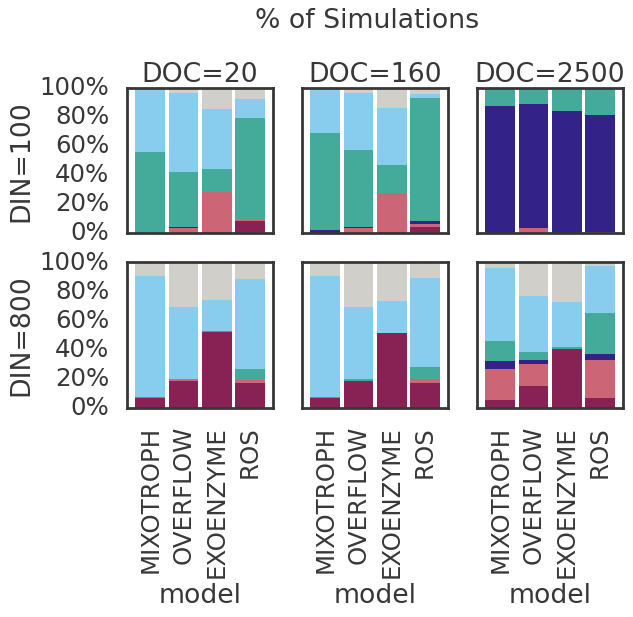

In [41]:

fig, axes = plt.subplots(len(din_order),len(doc_order), figsize=(8,5), sharex=True , sharey=True)

# all simulations row
                         
for row_idx, din_val  in enumerate(din_order):
    for doc_val, ax in zip(doc_order, axes[row_idx]):

        #cdf = count_df.copy()
        tdf = count_df.loc[count_df['DOC'].isin([doc_val]) & count_df['DIN'].isin([din_val])]
        cdf = tdf[gorder].div(tdf[gorder].sum(axis=1), axis=0) * 100
        
        cdf.index=tdf.model 
        cdf = cdf.reindex(index=morder)
        title = f'DOC={doc_val}'
        ylabel = f'DIN={din_val}'
        if row_idx != 0 :
            title=''
        if doc_val != doc_order[0]:
            ylabel=''
        cdf[gorder].plot(
            kind='bar', stacked=True, color=gpalette, width=0.9, #figsize=(3,3),
            rot=90, lw=0.01, 
            ylabel=ylabel, title=title, legend=False,
            #title='Breakdown of Simulations per Phenotype',
            ax=ax
        )
plt.suptitle('% of Simulations', y=1.1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'MIXOTROPH'),
  Text(1, 0, 'OVERFLOW'),
  Text(2, 0, 'EXOENZYME'),
  Text(3, 0, 'ROS')])

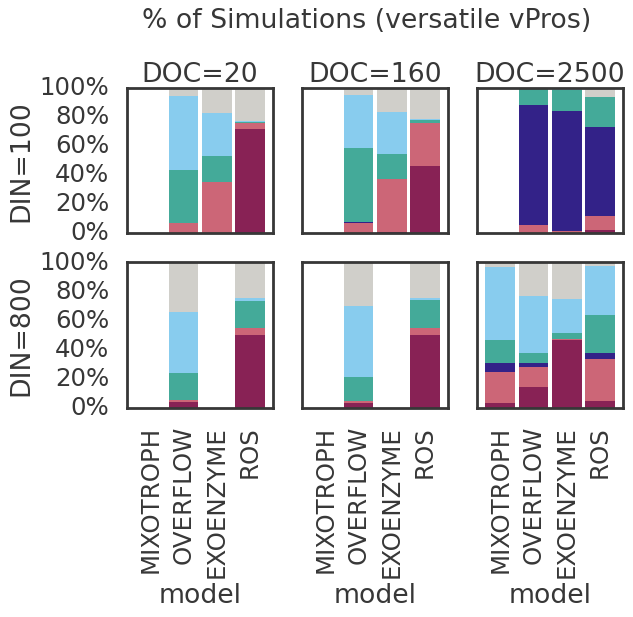

In [43]:

fig, axes = plt.subplots(len(din_order),len(doc_order), figsize=(8,5), sharex=True , sharey=True)

# all simulations row
                         
for row_idx, din_val  in enumerate(din_order):
    for doc_val, ax in zip(doc_order, axes[row_idx]):

        #cdf = count_df.copy()
        tdf = count_ver_df.loc[count_ver_df['DOC'].isin([doc_val]) & count_ver_df['DIN'].isin([din_val])]
        cdf = tdf[gorder].div(tdf[gorder].sum(axis=1), axis=0) * 100
        
        cdf.index=tdf.model 
        cdf = cdf.reindex(index=morder)
        title = f'DOC={doc_val}'
        ylabel = f'DIN={din_val}'
        if row_idx != 0 :
            title=''
        if doc_val != doc_order[0]:
            ylabel=''
        cdf[gorder].plot(
            kind='bar', stacked=True, color=gpalette, width=0.9, #figsize=(3,3),
            rot=90, lw=0.01, 
            ylabel=ylabel, title=title, legend=False,
            #title='Breakdown of Simulations per Phenotype',
            ax=ax
        )
plt.suptitle('% of Simulations (versatile vPros)', y=1.1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'MIXOTROPH'),
  Text(1, 0, 'OVERFLOW'),
  Text(2, 0, 'EXOENZYME'),
  Text(3, 0, 'ROS')])

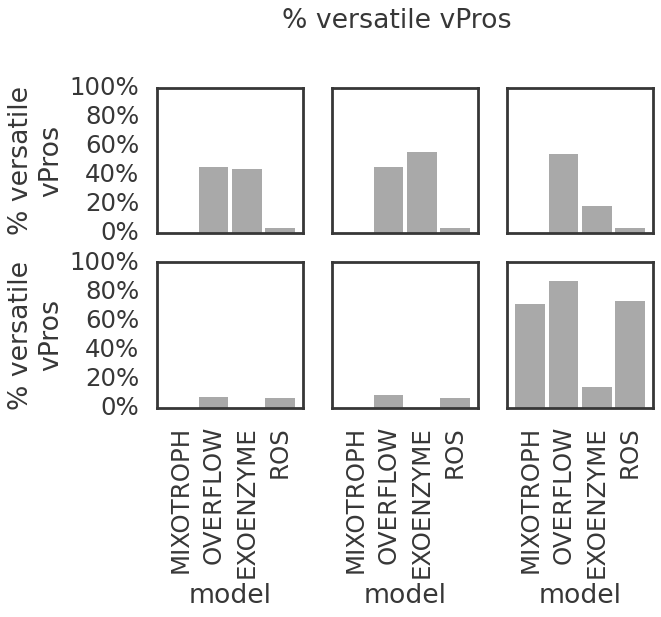

In [52]:

fig, axes = plt.subplots(len(din_order),len(doc_order), figsize=(8,5), sharex=True , sharey=True)

# all simulations row
                         
for row_idx, din_val  in enumerate(din_order):
    for doc_val, ax in zip(doc_order, axes[row_idx]):
        
        cdf = vcount_df.loc[vcount_df['DOC'].isin([doc_val]) & vcount_df['DIN'].isin([din_val])].copy()
        cdf['Versatile'] = cdf['Versatile']*100
        cdf.index=cdf.model 
        cdf = cdf.reindex(index=morder)
        cdf['Versatile'].plot(
            kind='bar', stacked=True, color='#A9A9A9', width=0.9, #figsize=(3,3),
            rot=90, lw=0.01, 
            ylabel='% versatile\nvPros',  legend=False,
            ax=ax
        )
plt.suptitle('% versatile vPros', y=1.1)
plt.yticks([0,20,40,60,80,100])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)

In [45]:
count_df.loc[count_df.DIN.isin([800])]

,Category,model,DIN,DOC,Sensitivity,Strong,Sustained,Inhibited,Weak,Neutral,Other
12,DIN800,EXOENZYME,800.0,20.0,NaN,3300,4,0.0,4,1343,1645
13,DIN800,MIXOTROPH,800.0,20.0,NaN,152,20,0.0,0,1929,225
14,DIN800,OVERFLOW,800.0,20.0,NaN,905,14,0.0,53,2398,1497
15,DIN800,ROS,800.0,20.0,NaN,374,47,0.0,161,1352,244
16,DIN800DOC160,EXOENZYME,800.0,160.0,NaN,3216,3,0.0,8,1360,1662
17,DIN800DOC160,MIXOTROPH,800.0,160.0,NaN,151,19,0.0,2,1917,219
18,DIN800DOC160,OVERFLOW,800.0,160.0,NaN,895,13,0.0,59,2416,1483
19,DIN800DOC160,ROS,800.0,160.0,NaN,379,52,0.0,178,1343,233
20,DIN800DOC2500,EXOENZYME,800.0,2500.0,NaN,1797,3,0.0,68,1354,1218
21,DIN800DOC2500,MIXOTROPH,800.0,2500.0,NaN,111,447,115.0,276,1036,87
